In [110]:
%matplotlib inline

import spikeinterface.full as si

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.backends.backend_pdf import PdfPages


In [111]:
base_folder = Path('/media/ubuntu/sda/Spike_Sorting/paper_architecture/01_real_data/02_Neuropixel_384_channels_human/')

spikeglx_folder = base_folder / 'Pt01'

In [112]:
stream_names, stream_ids = si.get_neo_streams('spikeglx', spikeglx_folder)


In [113]:
raw_rec = si.read_spikeglx(spikeglx_folder, stream_name='imec0.ap', load_sync_channel=False)

In [109]:
raw_rec

SpikeGLXRecordingExtractor: 384 channels - 30.0kHz - 1 segments - 25,014,692 samples 
                            833.82s (13.90 minutes) - int16 dtype - 17.89 GiB

In [114]:
rec1 = si.highpass_filter(raw_rec, freq_min=400)
rec4 = si.common_reference(rec1, operator="median", reference="global")

In [115]:
sorting_param = si.get_default_sorter_params('kilosort4')
sorting_param['do_correction'] = True

In [117]:
sorting = si.run_sorter('kilosort4', rec4, output_folder='/media/ubuntu/sda/Spike_Sorting/paper_architecture/01_real_data/02_Neuropixel_384_channels_human/kilosort_spike_sorting/Pt01',
                         verbose=True, **sorting_param)


/tmp/ipykernel_79667/4250336977.py:1: DeprecationWarning: `output_folder` is deprecated and will be removed in version 0.103.0 Please use folder instead
  sorting = si.run_sorter('kilosort4', rec4, output_folder='/media/ubuntu/sda/Spike_Sorting/paper_architecture/01_real_data/02_Neuropixel_384_channels_human/kilosort_spike_sorting/Pt01',
write_binary_recording (no parallelization): 100%|██████████| 834/834 [05:07<00:00,  2.72it/s]
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: N samples: 25014692
kilosort.run_kilosort: N seconds: 833.8230666666667
kilosort.run_kilosort: N batches: 417
kilosort.run_kilosort: Preprocessing filters computed in  0.73s; total  0.73s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:     5.10 %

kilosort4 run time 635.27s


In [118]:
analyzer = si.create_sorting_analyzer(sorting, rec4, sparse=True, format="memory")

estimate_sparsity (no parallelization): 100%|██████████| 834/834 [02:42<00:00,  5.14it/s]


In [ ]:
extensions_to_compute = [
            "random_spikes",
            "waveforms",
            "noise_levels",
            "templates",
            "spike_amplitudes",
            "unit_locations",
            "spike_locations",
            "correlograms",
            "template_similarity"
        ]

extension_params = {
    "unit_locations": {"method": "center_of_mass"},
    "spike_locations": {"ms_before": 0.1},
    "correlograms": {"bin_ms": 0.1},
    "template_similarity": {"method": "cosine_similarity"}
}

analyzer.compute(extensions_to_compute, extension_params=extension_params)



noise_level (no parallelization): 100%|██████████| 20/20 [00:03<00:00,  5.29it/s]
Compute : spike_amplitudes + spike_locations (no parallelization): 100%|██████████| 834/834 [03:41<00:00,  3.76it/s]


NameError: name 'sqm' is not defined

In [120]:
import spikeinterface.qualitymetrics as sqm

qm_params = sqm.get_default_qm_params()
analyzer.compute("quality_metrics", qm_params)
analyzer_saved = analyzer.save_as(folder="/media/ubuntu/sda/Spike_Sorting/paper_architecture/01_real_data/02_Neuropixel_384_channels_human/kilosort_spike_sorting/Pt01/analyzer", format="binary_folder")

/home/ubuntu/.conda/envs/spike_sorting_jct/lib/python3.11/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:1281: UserWarning: Amplitude PDF does not have a unique minimum! More spikes might be required for a correct amplitude_cutoff computation!
  warnings.warn(
/home/ubuntu/.conda/envs/spike_sorting_jct/lib/python3.11/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:910: UserWarning: Some units have too few spikes : amplitude_cutoff is set to NaN
  warnings.warn(f"Some units have too few spikes : amplitude_cutoff is set to NaN")
/home/ubuntu/.conda/envs/spike_sorting_jct/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ubuntu/.conda/envs/spike_sorting_jct/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ubuntu/.conda/envs/s

In [121]:
import spikeinterface.exporters as sexp
sexp.export_to_phy(analyzer, "/media/ubuntu/sda/Spike_Sorting/paper_architecture/01_real_data/02_Neuropixel_384_channels_human/kilosort_spike_sorting/Pt01/phy_folder_for_kilosort", verbose=True)


extract PCs (no parallelization): 100%|██████████| 834/834 [26:45<00:00,  1.92s/it]  

Run:
phy template-gui  /media/ubuntu/sda/Spike_Sorting/paper_architecture/01_real_data/02_Neuropixel_384_channels_human/kilosort_spike_sorting/Pt01/phy_folder_for_kilosort/params.py


In [26]:
raw_rec.get_channel_ids()[:10]

array(['imec0.ap#AP0', 'imec0.ap#AP1', 'imec0.ap#AP2', 'imec0.ap#AP3',
       'imec0.ap#AP4', 'imec0.ap#AP5', 'imec0.ap#AP6', 'imec0.ap#AP7',
       'imec0.ap#AP8', 'imec0.ap#AP9'], dtype='<U64')

In [32]:
a = rec4.get_traces(channel_ids=raw_rec.get_channel_ids()[:10], start_frame=0, end_frame=1000)

In [68]:
a.ax.get_lines()

<a list of 20 Line2D objects>

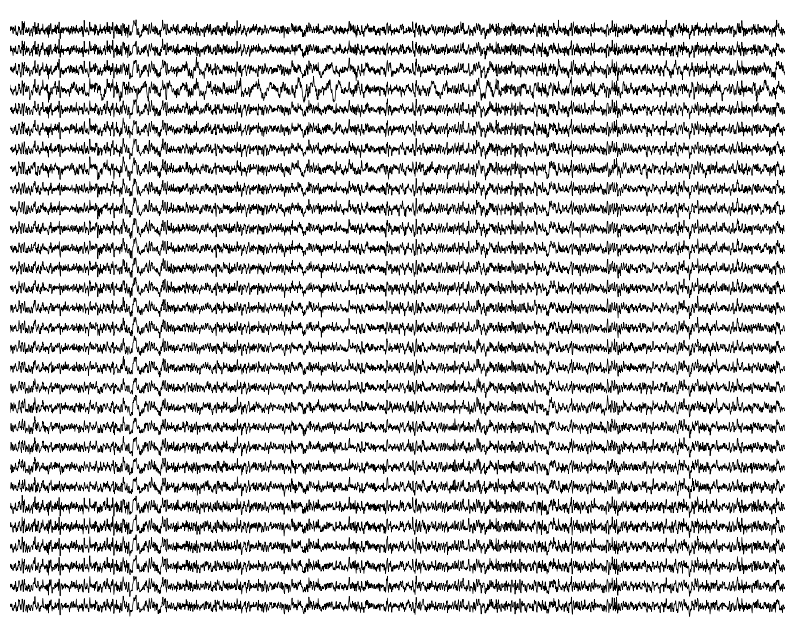

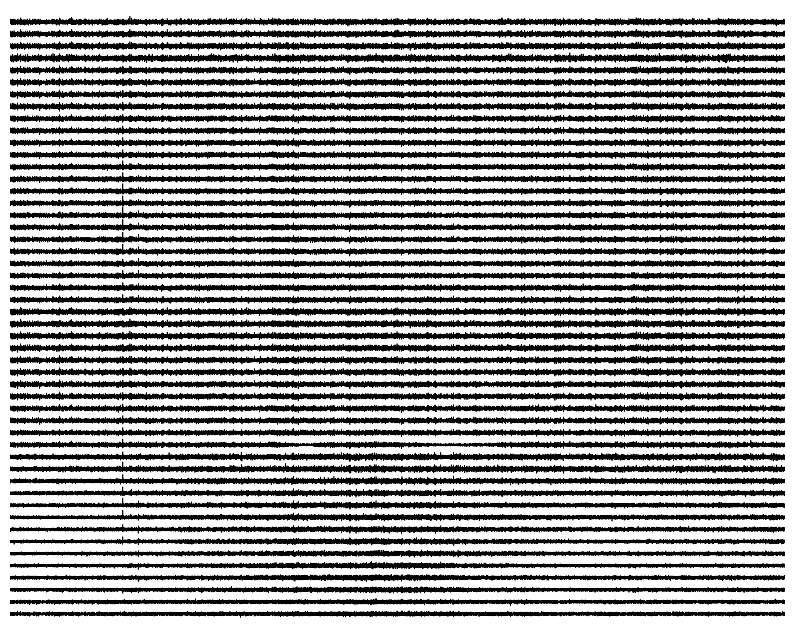

In [100]:
with PdfPages("Pt03_traces.pdf") as pdf:
    a = si.plot_traces(rec4, channel_ids=raw_rec.get_channel_ids()[-30:], time_range=(0.35, 0.45),order_channel_by_depth=True)
    for line in a.ax.get_lines():
        line.set_linewidth(0.5)
    a.ax.set_frame_on(False)

    if a.ax.legend_ is not None:
        a.ax.legend_.remove()


    a.ax.set_xticks([])
    a.ax.set_yticks([])

    a.ax.set_xlabel('')
    a.ax.set_ylabel('')

    a.ax.figure.set_size_inches(10, 8)
    pdf.savefig(a.figure)

    a = si.plot_traces(rec4, channel_ids=raw_rec.get_channel_ids()[-50:], time_range=(6, 7),order_channel_by_depth=True)
    for line in a.ax.get_lines():
        line.set_linewidth(0.5)
    a.ax.set_frame_on(False)

    if a.ax.legend_ is not None:
        a.ax.legend_.remove()


    a.ax.set_xticks([])
    a.ax.set_yticks([])

    a.ax.set_xlabel('')
    a.ax.set_ylabel('')

    a.ax.figure.set_size_inches(10, 8)
    pdf.savefig(a.figure)


In [101]:
rec4

CommonReferenceRecording: 384 channels - 30.0kHz - 1 segments - 17,588,367 samples 
                          586.28s (9.77 minutes) - int16 dtype - 12.58 GiB

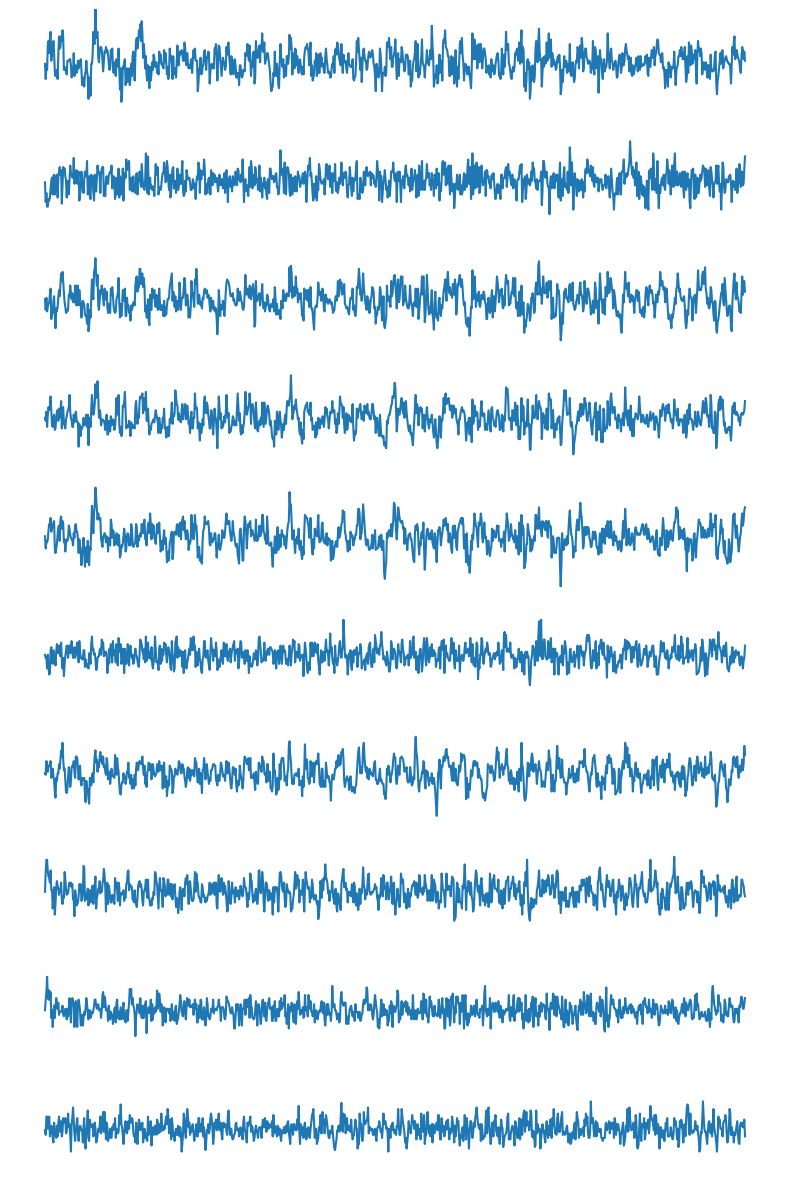

In [41]:
num_channels = a.shape[1]
fig, axes = plt.subplots(num_channels, 1, figsize=(8, 12), sharex=True)  # 创建 10 个子图，纵向排列

# 设置统一的 ylim 范围
ylim_min = np.min(a)
ylim_max = np.max(a)

for i in range(num_channels):
    sns.lineplot(x=np.arange(a.shape[0]), y=a[:, i], ax=axes[i])  # 绘制每个通道的 lineplot
    axes[i].set_ylim(ylim_min, ylim_max)  # 设置统一的 ylim 范围
    axes[i].grid(False)  # 关闭网格线

    # 移除边框
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)

    axes[i].tick_params(axis='y', which='both', left=False, labelleft=False)
    axes[i].tick_params(axis='x', which='both', bottom=False, labelbottom=False)


plt.subplots_adjust(hspace=0.01)  # 调整子图之间的间距

# 显示图
plt.tight_layout()
plt.show()